In [1]:
import sys
sys.path.insert(0,"/Library/Python/2.7/site-packages")
#sys.path

import numpy as np
import scipy as sp
import pandas as pd
#print np.__version__
#print np.__file__

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
from matplotlib import rcParams
#from matplotlib.dates import YearLocator, MonthLocator, DayLocator, DateFormatter
import matplotlib.dates as mdates
import matplotlib.collections as mplcoll
import matplotlib.colors as mplcolor
#print mpl.__version__
#print mpl.__file__

import json
from operator import itemgetter
%matplotlib inline

import datetime as DT

import MySQLdb

##  Load Generic Functions

In [2]:
%run 'new_user_activation_funcs.ipynb'

## Load Data

In [3]:

#thisDF = grabDF_new_users_daily("2016-01-01", "2016-07-01")
thisDF = grabDF_new_users_daily("2016-01-01", "2016-06-06")

startday = thisDF.iloc[0].day
print startday
thislen = len(thisDF.index)
print thislen
#thisDF['newday'] = pd.date_range(start=startday,periods=thislen,freq='D')
#thisDF.index = pd.date_range(start=startday,periods=thislen,freq='D')

#thisDF.set_index('day')

#
# this was me trying to play with date stuff to fix below error ... but to no avail ....
#
#newDF = thisDF.set_index('day')
#newDF = thisDF.set_index('newday')
#newDF.index.inferred_freq = 'D'
#newDF.index.freq = 'D'
#print newDF.head()
#print newDF.dtypes
#print newDF.index
#print newDF.index.freq

grabbed new users from:  2016-01-01  to  2016-06-06
2016-01-01 00:00:00
158


## Use Pandas autocorrelation

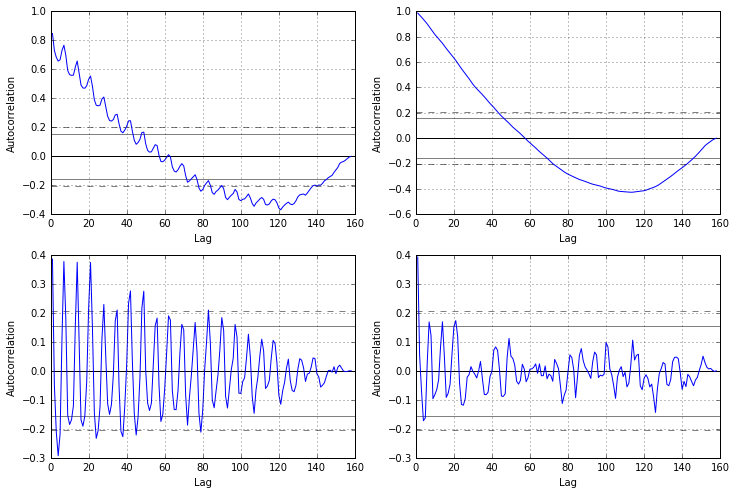

In [4]:
from pandas.tools.plotting import autocorrelation_plot

fig = plt.figure( figsize = (12.,8.))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

autocorrelation_plot(thisDF['NewUsers'], ax=ax1)
autocorrelation_plot(thisDF['ExpMA7'], ax=ax2)
autocorrelation_plot(thisDF['NewUsers'] - thisDF['ExpMA7'], ax=ax3)
autocorrelation_plot(thisDF['NewUsers'] - thisDF['Pred1'], ax=ax4)

In [5]:
thisDF.corr()

,NewUsers,daynum,ExpMA7,delta,DOWcorr,Pred1
NewUsers,1.000000,-0.873825,0.892169,0.577874,0.269635,0.919624
daynum,-0.873825,1.000000,-0.980618,-0.141823,-0.011482,-0.911801
ExpMA7,0.892169,-0.980618,1.000000,0.149011,0.020550,0.932534
delta,0.577874,-0.141823,0.149011,1.000000,0.561194,0.332390
DOWcorr,0.269635,-0.011482,0.020550,0.561194,1.000000,0.379013
Pred1,0.919624,-0.911801,0.932534,0.332390,0.379013,1.000000


## Now use statsmodels autocorrelation function, so basically do the above manually

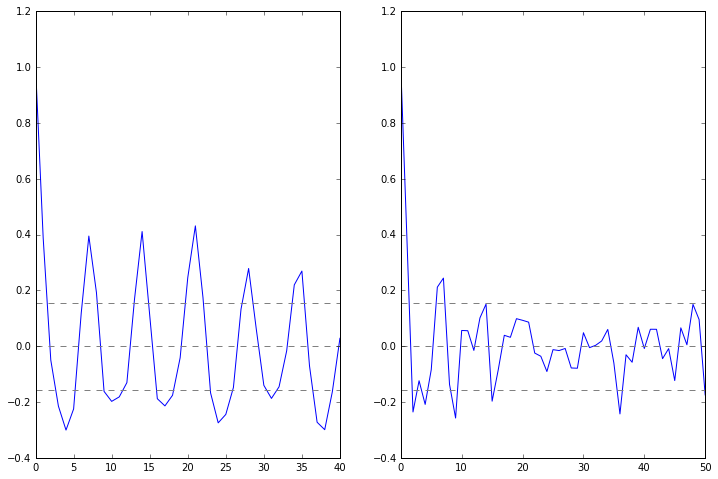

In [6]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

thisacf = acf(thisDF['NewUsers'] - thisDF['ExpMA7'], 50)
#print thisacf
thispacf = pacf(thisDF['NewUsers'] - thisDF['ExpMA7'], 50)
#print thispacf

fig = plt.figure( figsize = (12.,8.))
ax1 = fig.add_subplot(1,2,1)
plt.plot(thisacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')

ax2 = fig.add_subplot(1,2,2)
plt.plot(thispacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')

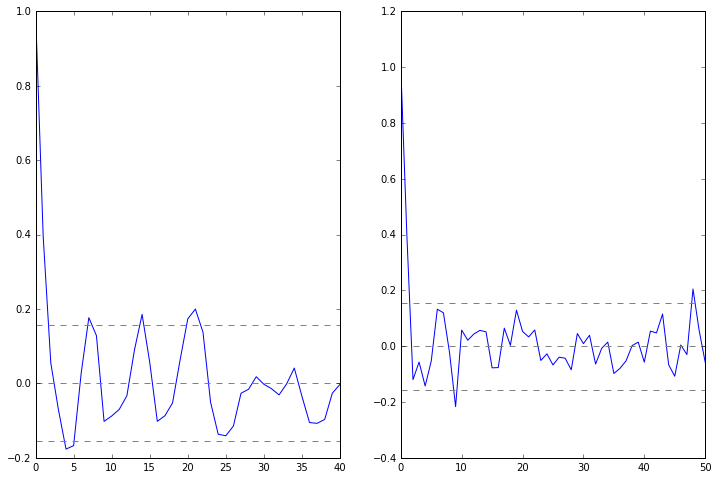

In [7]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

thisacf = acf(thisDF['NewUsers'] - thisDF['Pred1'], 50)
#print thisacf
thispacf = pacf(thisDF['NewUsers'] - thisDF['Pred1'], 50)
#print thispacf

fig = plt.figure( figsize = (12.,8.))
ax1 = fig.add_subplot(1,2,1)
plt.plot(thisacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')

ax2 = fig.add_subplot(1,2,2)
plt.plot(thispacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(thisDF.shape[0]),linestyle='--',color='gray')